In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from collections import Counter

In [273]:
pd.options.mode.chained_assignment = None
df_time_it_large= pd.DataFrame(df_time_large['reconcILSTime_iterative']).rename(columns={"reconcILSTime_iterative": "Time"})

val=['reconcILSTime_iterative' for i in range(934)]

df_time_it_large.insert(1, "Process", val, True)
df_time_it_large=pd.DataFrame(df_time_it_large)


df_time_re_large= pd.DataFrame(df_time_large['reconcILSTime_recurssive']).rename(columns={"reconcILSTime_recurssive": "Time"})
val=['reconcILSTime_recurssive' for i in range(934)]
df_time_re_large['Process']=val

df_time_dl_large= pd.DataFrame(df_time_large['dlcparTime']).rename(columns={"dlcparTime": "Time"})
val=['dlcparTime' for i in range(934)]


df_time_dl_large['Process']=val
pd1_large =pd.concat([df_time_it_large,df_time_re_large,df_time_dl_large],axis=0)

In [274]:
df_time = pd.read_csv('./bin/10_2_time_result.csv')

In [275]:
pd.options.mode.chained_assignment = None
df_time_it= pd.DataFrame(df_time['reconcILSTime_iterative']).rename(columns={"reconcILSTime_iterative": "Time"})

val=['reconcILSTime_iterative' for i in range(820)]

df_time_it.insert(1, "Process", val, True)
df_time_it=pd.DataFrame(df_time_it)


df_time_re= pd.DataFrame(df_time['reconcILSTime_recurssive']).rename(columns={"reconcILSTime_recurssive": "Time"})
val=['reconcILSTime_recurssive' for i in range(820)]
df_time_re['Process']=val

df_time_dl= pd.DataFrame(df_time['dlcparTime']).rename(columns={"dlcparTime": "Time"})
val=['dlcparTime' for i in range(820)]


df_time_dl['Process']=val
pd1 =pd.concat([df_time_it,df_time_re,df_time_dl],axis=0)

ValueError: Length of values (820) does not match length of index (812)

,Time,Process
0,0.319124,reconcILSTime_iterative
1,4.429877,reconcILSTime_iterative
2,7.711681,reconcILSTime_iterative
3,0.163990,reconcILSTime_iterative
4,0.027822,reconcILSTime_iterative
...,...,...
929,1.330379,dlcparTime
930,0.939456,dlcparTime
931,0.967623,dlcparTime
932,1.298127,dlcparTime


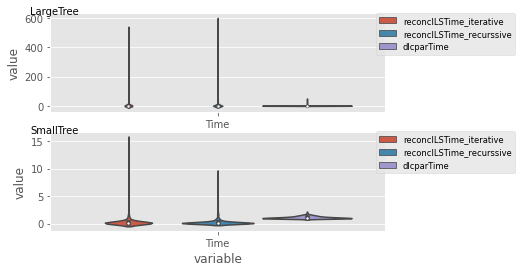

In [241]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
# Create some data
data = {
    "Large": pd1_large,
    "Small": pd1,
    
}

# Create a figure and axes
fig, axis = plt.subplots(2)

# Plot the box plots
i=0
for category, values in data.items():
    sns.violinplot(x="variable", y="value",hue="Process", data=pd.melt(values, id_vars =['Process']),ax=axis[i])
    plt.rc('legend',fontsize='small')
    axis[i].legend(bbox_to_anchor=(1.4, 1.05))

    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    axis[i].text(0.0, 1.0, category+'Tree', transform=axis[i].transAxes + trans,
            fontsize='medium', va='top')
    i=i+1

# Set the title and labels

# Show the plot
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

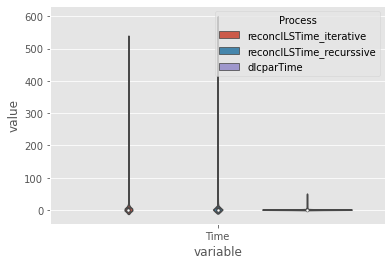

In [160]:
sns.violinplot(x="variable", y="value",hue="Process", data=pd.melt(pd1, id_vars =['Process']))


In [116]:
df_time_high_ILS = pd.read_csv('./bin/10_3_high_ILS_time_result.csv')


In [117]:
df_time_large

,Replicate,Gene_tree,reconcILSTime_iterative,reconcILSTime_recurssive,dlcparTime,ete_time
0,0,"(((A,A),A),(B,C));",0.140754,0.106418,0.521295,0.013127
1,1,"((B,B),B);",0.069557,0.048837,0.502652,0.003957
2,2,"((A,B),C);",0.071418,0.024320,0.534093,0.001998
3,3,"((((A,A),B),C),A);",0.131160,0.130910,0.519286,0.005942
4,4,"((C,A),B);",0.020851,0.032352,0.597293,0.001949
...,...,...,...,...,...,...
815,994,"((C,B),A);",0.010636,0.015708,0.551286,0.003711
816,995,"((C,B),A);",0.010506,0.012197,0.539539,0.001597
817,996,"((C,C),(((C,C),B),A));",0.355130,0.272713,0.542285,0.006927
818,997,"(A,B);",0.006223,0.009146,0.595550,0.000792


In [284]:
df_time_large[['reconcILSTime_recurssive','ete_time','dlcparTime']].mean()

reconcILSTime_recurssive    0.111173
ete_time                    0.004285
dlcparTime                  0.540502
dtype: float64

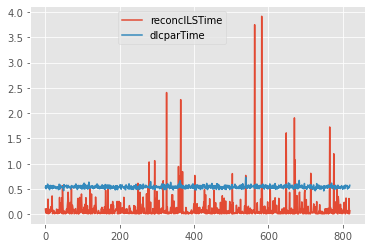

In [286]:
df_time_large[['reconcILSTime_recurssive','dlcparTime']].rename(columns={'reconcILSTime_recurssive': 'reconcILSTime'}).plot()
plt.savefig('small_tree_time.png')
plt.legend(bbox_to_anchor=(0.6,1))

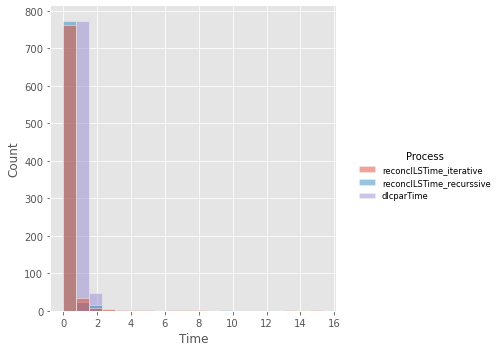

In [459]:
pd1 = pd1.reset_index()

sns.displot(pd1, x="Time",hue='Process', bins=20)


In [244]:
df_time[['reconcILSTime_iterative','reconcILSTime_recurssive','dlcparTime']].mean()

NameError: name 'df_time' is not defined

<AxesSubplot:>

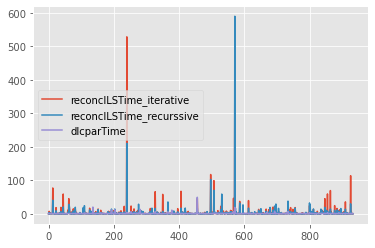

In [74]:
df_time[['reconcILSTime_iterative','reconcILSTime_recurssive','dlcparTime']].plot()

In [66]:
df_time =df_time[df_time.reconcILSTime_iterative<100]

In [ ]:
df_diff_D = df_time[df_time['dlcparTime']<df_time['reconcILSTime']].fillna('')
df_diff_D

In [99]:
df_diff_D[(df_diff_D.reconcILSTime >100)]['Gene_tree']

Series([], Name: Gene_tree, dtype: object)

In [3]:
df = pd.read_csv('./bio_result_1.csv')

In [4]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,Loss
0,reconcILS,0,"((L C,((((L AA,L AB)L,(L G,L Z)L)L,((((L ...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",4,8,13
1,ete3,0,"((((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),(...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",9,0,132
2,reconcILS,1,"(((((L AC,B),A),((F,(E,D)),C)1I E-D-F)1I D-...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",5,6,6
3,ete3,1,"(((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",11,0,115
4,reconcILS,2,"(L C,((((((AB,AB)D,AA),((Z,Z)D,G)),((Y,(X,(((...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",6,7,10
5,ete3,2,"((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",10,0,92
6,reconcILS,3,"((A,(L AC,B)),((((((G,AA)1I AA,AB)1I G,Z),(...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",1,6,1
7,ete3,3,"((((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),(...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",6,0,74
8,reconcILS,4,"((AC,((F,(E,D)),C)1I AC+1I E-D-F)1I E-D-F-A...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",3,15,5
9,ete3,4,"((C,((((E,D),F),((AC,B),(A,A))),(((((((((N,H),...","((((((((U,(W,V)),T),X),Y),(((((N,H),(K,L)),((M...",11,0,107


In [5]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [9]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [362]:
dlc_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
dlc_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
dlc_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
dlc_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_dlc = pd.concat([dlc_Duplication,dlc_Loss],axis=1)

In [22]:
ete_Duplication = pd.DataFrame(list(df[(df.Process == "ete3")]['Duplication']),columns=['Duplication'])
#ete_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ete_Loss = pd.DataFrame(list(df[(df.Process == "ete3")]['Loss']),columns=['Loss'])
#True_ete= pd.DataFrame(list(df[(df.Process == "ETE3")]['DLCILS']),columns=['DLCILS'])
concat_e = pd.concat([ete_Duplication,ete_Loss],axis=1)

In [23]:
true_reconcILS= pd.DataFrame(concat_O)

val =['reconcILS' for i in range(20)]
true_reconcILS['Algorithm']=val

true_ete3= pd.DataFrame(concat_e)

val =['ete3' for i in range(20)]
true_ete3['Algorithm']=val


In [24]:

new =pd.concat([true_reconcILS,true_ete3],axis=0)
new

,Duplication,Loss,Algorithm
0,4,13,reconcILS
1,5,6,reconcILS
2,6,10,reconcILS
3,1,1,reconcILS
4,3,5,reconcILS
5,5,0,reconcILS
6,5,20,reconcILS
7,7,5,reconcILS
8,3,13,reconcILS
9,13,6,reconcILS


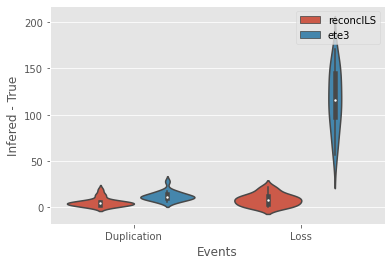

In [25]:
#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Infered - True")
plt.savefig('box_plot.jpg', dpi=500)
plt.savefig('small_only_loss.png')


#### concat_true_e

In [364]:
print(len(True_Duplication))

1000


In [365]:
print(len(O_Duplication))

1000


In [371]:
print(len(concat_dlc))

1000


In [8]:
#True_Duplication['Replicate']=[i for i in range(21)]
O_Duplication['Replicate']=[i for i in range(21)]
#dlc_Duplication['Replicate']=[i for i in range(21)]
ete_Duplication['Replicate']=[i for i in range(21)]


ValueError: Length of values (21) does not match length of index (20)

In [368]:
pd.DataFrame((concat_true_e-concat_true))

NameError: name 'concat_true_e' is not defined

In [374]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(1000)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [377]:
true_dlc_dups= pd.DataFrame((concat_dlc-concat_true))
val =['DLCpar' for i in range(1000)]
true_dlc_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [378]:
true_ete_dups= pd.DataFrame((concat_e-concat_true))
val =['ete3' for i in range(1000)]
true_ete_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [237]:
true_ete_dups

,Duplication,Loss,Algorithm
0,0,1,ete3
1,0,2,ete3
2,1,3,ete3
3,0,0,ete3
4,0,0,ete3
...,...,...,...
995,0,2,ete3
996,0,4,ete3
997,0,0,ete3
998,1,3,ete3


In [238]:
true_ete3_dups

NameError: name 'true_ete3_dups' is not defined

In [588]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [589]:
val

425

In [590]:
[true_reconils_dups,true_dlc_dups,true_dlc_dups]

[     Duplication  Loss  Algorithm
 0              0     0  reconcILS
 1              0    -1  reconcILS
 2             -1     3  reconcILS
 3             -1     0  reconcILS
 4              0     0  reconcILS
 ..           ...   ...        ...
 929           -1    -1  reconcILS
 930           -1    -1  reconcILS
 931            0     0  reconcILS
 932            0     0  reconcILS
 933           -1     1  reconcILS
 
 [934 rows x 3 columns],
      Duplication  Loss Algorithm
 0              0    -1    DLCpar
 1             -1     0    DLCpar
 2             -2     0    DLCpar
 3             -1     0    DLCpar
 4              0    -1    DLCpar
 ..           ...   ...       ...
 929           -2    -2    DLCpar
 930           -1    -1    DLCpar
 931            0     1    DLCpar
 932            0    -1    DLCpar
 933           -1     1    DLCpar
 
 [934 rows x 3 columns],
      Duplication  Loss Algorithm
 0              0    -1    DLCpar
 1             -1     0    DLCpar
 2             -

In [379]:
new =pd.concat([true_reconils_dups,true_dlc_dups,true_ete_dups],axis=0)
new

,Duplication,Loss,Algorithm
0,0,0,reconcILS
1,0,0,reconcILS
2,0,0,reconcILS
3,0,0,reconcILS
4,0,0,reconcILS
...,...,...,...
995,0,2,ete3
996,0,4,ete3
997,0,0,ete3
998,1,3,ete3


In [7]:
#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Infered - True")
plt.savefig('box_plot.jpg', dpi=500)
plt.savefig('small_only_loss.png')


NameError: name 'new' is not defined

In [300]:
df1

,Gene_tree,Duplication,NNI,Loss
Replicate,,,,
0,"(((A,A),A),(B,C));",2,0,0
1,"((B,B),B);",2,0,2
2,"((A,B),C);",0,1,0
3,"((((A,A),B),C),A);",2,1,1
4,"((C,A),B);",0,1,0
...,...,...,...,...
994,"((C,B),A);",0,0,0
995,"((C,B),A);",0,0,0
996,"((C,C),(((C,C),B),A));",3,2,0


In [ ]:
df[['Replicate','Process','Duplication']][(df.Process == 'Our_algorithm')]

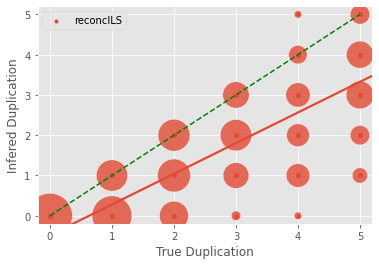

<Figure size 432x288 with 0 Axes>

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
#result12 =pd.concat([True_Duplication['Duplication'],dlc_Duplication['Duplication']], ignore_index=True,axis=1)
#result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')

sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
#sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
#ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups_small.png', dpi=500)

plt.show()
plt.clf()

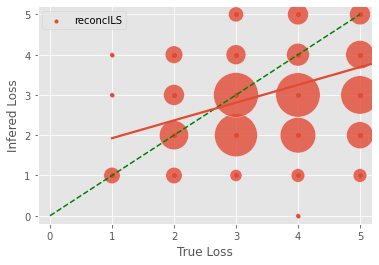

<Figure size 432x288 with 0 Axes>

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

#result12 =pd.concat([TRUE_Loss['Loss'],dlc_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
#result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
#sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
#ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss_small.png', dpi=500)

plt.show()
plt.clf()

In [101]:
r =result1.astype('category')

In [102]:
r

,0,1
0,0,0
1,2,2
2,0,0
3,1,1
4,0,0
...,...,...
815,0,0
816,0,0
817,3,0
818,1,1


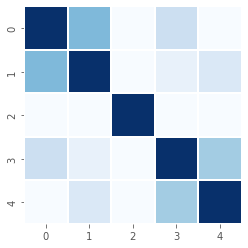

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [104]:
np.array([list(result1[0]), list(result1[1])])

array([[0, 2, 0, ..., 3, 1, 0],
       [0, 2, 0, ..., 0, 1, 0]])

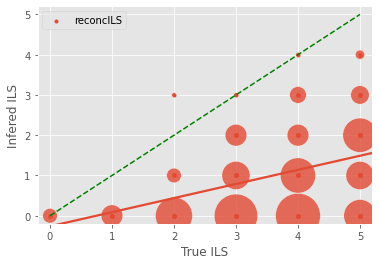

<Figure size 432x288 with 0 Axes>

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
#result12 =pd.concat([True_DLCILS['DLCILS'],dlc_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
#result22=result12.groupby([0,1]).size().reset_index(name='Count')
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
#sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
#ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True ILS")
plt.ylabel("Infered ILS")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI_small.png', dpi=500)

plt.show()
plt.clf()

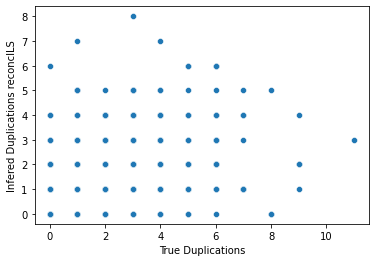

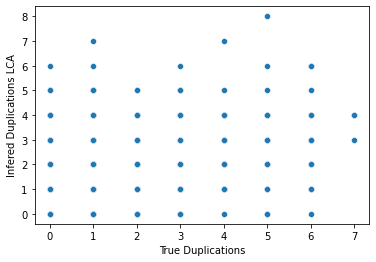

In [223]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

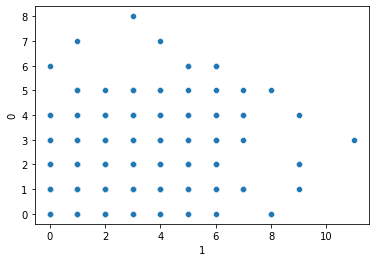

In [224]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [314]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [315]:
rho

0.11876571433230064

In [11]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['NNI']))

In [12]:
rho

0.5475379703549665

In [318]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [319]:
rho

0.8570549759786428

In [15]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['NNI']))

In [16]:
rho

0.9405938399046201

In [323]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [324]:
rho

0.4371714921250745

In [17]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI']))

In [18]:
rho

0.8204650528888343